## Timeseries Homework

In [1]:
# Dependencies and modules:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math
from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 

# temperature.csv file:

temperature_path = "C:/Users/Nik/Documents/temperature.csv"
temperature_df = pd.read_csv(temperature_path,parse_dates=True, index_col='datetime')

temperature_df.head(1)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.1,NaN,NaN,NaN


1. What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?

Timeseries data can be either continuous or discrete depending on the data you are working with. You could have discrete timeseries data with timestamps referring to user logins or irregular events. Time series data can be continuous if you are working with timestamps that break units of time up into floating point values, such as when using fractions of a minute or seconds. 

2. What does ARIMA stand for? Break down and explain each piece in the name.


ARIMA stands for auto-regressive integrated moving average. Autoregression is a model that predicts future values based on past values. "Integrated" represents differencing the raw observations to allow for the time series to become stationary. And finally, moving average incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

3. Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.


In [2]:
# I will convert to Celsius with following function:
def Kelvin_to_Celsius(city,scale='C'):
    """Function converts the the df temp in Kelvin to Celsius"""
    try:
        if scale == 'C':
            city = city - 273.15
        else:
            print("Scale should either be Celsius(C)")
    except Exception as e:
        print(e)
    return city



In [3]:
temperature_df_Celsius = pd.DataFrame(index=temperature_df.index)

for col in temperature_df.columns:
    temperature_df_Celsius[col] = Kelvin_to_Celsius(temperature_df[col],scale='C')
#I don't know what "unsupported operand type(s) for -: 'str' and 'floa.t" means, but code worked, so I am moving on

In [4]:
temperature_df_Celsius.head()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
2012-10-01 15:00:00,11.476998,8.941867,16.310618,8.639833,18.712845,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697789,14.081672,34.241513,31.131841,37.261539,31.25,31.25,30.35
2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700441,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35


4. Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.


In [5]:
# I will use the .interpolate() function to full NANs in my data

temperature_df_Celsius_patched = temperature_df_Celsius.interpolate(limit_area='inside')

#Here, I am checking to see if the numbers have changed as an indication
# that my .interpolate() worked.

print(temperature_df_Celsius_patched.isna().sum().sum())
print(temperature_df_Celsius.isna().sum().sum())


print(temperature_df_Celsius_patched['Montreal'].isna())
print(temperature_df_Celsius['Montreal'].isna())

#Just checking: 
temperature_df_Celsius['Montreal']

7955
8030
datetime
2012-10-01 12:00:00     True
2012-10-01 13:00:00    False
2012-10-01 14:00:00    False
2012-10-01 15:00:00    False
2012-10-01 16:00:00    False
                       ...  
2017-11-29 20:00:00    False
2017-11-29 21:00:00    False
2017-11-29 22:00:00    False
2017-11-29 23:00:00    False
2017-11-30 00:00:00    False
Name: Montreal, Length: 45253, dtype: bool
datetime
2012-10-01 12:00:00     True
2012-10-01 13:00:00    False
2012-10-01 14:00:00    False
2012-10-01 15:00:00    False
2012-10-01 16:00:00    False
                       ...  
2017-11-29 20:00:00    False
2017-11-29 21:00:00    False
2017-11-29 22:00:00    False
2017-11-29 23:00:00    False
2017-11-30 00:00:00    False
Name: Montreal, Length: 45253, dtype: bool


datetime
2012-10-01 12:00:00          NaN
2012-10-01 13:00:00    12.680000
2012-10-01 14:00:00    12.684650
2012-10-01 15:00:00    12.697789
2012-10-01 16:00:00    12.710929
                         ...    
2017-11-29 20:00:00     1.980000
2017-11-29 21:00:00     0.980000
2017-11-29 22:00:00     0.330000
2017-11-29 23:00:00    -0.670000
2017-11-30 00:00:00    -1.350000
Name: Montreal, Length: 45253, dtype: float64

5. Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


In [6]:
# temperature_df_Celsius_patched = temperature_df_Celsius_patched.asfreq('1H')
# quarterly_data = temperature_df_Celsius_patched.asfreq('Q')
# quarterly_data.head()

In [8]:
# separating months from the datetime index
#temperature_df_Celsius_patched['datetime']= pd.to_datetime(temperature_df_Celsius_patched['datetime'], errors='coerce')
temperature_df_Celsius_patched['month']= pd.DatetimeIndex(temperature_df_Celsius_patched.index).month
temperature_df_Celsius_patched.head()
x=temperature_df_Celsius_patched
summer_months= [5,6,7,8,9]
winter_months=[10,11,12,1,2,3,4]
x[x.month.isin(summer_months)]

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
datetime,,,,,,,,,,,,,,,,,,,,,
2013-05-01 00:00:00,11.40,13.88,27.29,12.83,21.11,19.43,36.07,37.77,25.93,24.19,...,12.60,16.590,15.26,19.350,21.00,23.950,21.850,21.850,19.15,5
2013-05-01 01:00:00,10.96,13.43,27.10,11.98,20.67,17.97,35.69,37.28,24.40,23.32,...,12.04,16.070,13.69,19.350,21.00,21.000,21.850,21.850,19.15,5
2013-05-01 02:00:00,10.29,11.11,25.24,10.13,19.13,16.94,34.74,35.74,22.26,22.14,...,12.03,14.640,12.55,19.350,21.72,23.800,21.850,21.850,19.15,5
2013-05-01 03:00:00,9.47,8.93,23.17,8.44,17.28,15.14,32.39,33.77,19.42,20.60,...,12.01,13.880,11.45,27.250,21.72,23.430,24.950,24.950,28.25,5
2013-05-01 04:00:00,8.43,7.75,19.86,7.40,16.29,14.50,31.74,32.26,18.47,18.77,...,11.81,12.807,10.97,27.250,21.00,19.000,24.950,24.950,28.25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30 19:00:00,13.77,14.86,19.09,14.99,23.36,23.46,31.20,31.13,19.02,19.28,...,17.00,13.670,12.63,19.383,25.56,29.510,25.933,25.933,25.61,9
2017-09-30 20:00:00,13.80,16.50,21.08,15.99,24.95,24.16,32.20,32.70,20.76,19.64,...,16.36,15.000,12.23,15.161,25.56,29.020,25.861,25.861,25.61,9
2017-09-30 21:00:00,13.41,16.37,22.46,15.89,25.89,24.70,31.99,34.00,20.77,20.57,...,15.60,14.670,12.39,15.161,25.11,28.020,25.861,25.861,25.22,9


In [9]:
#Calculated averages for cities during summer months.
avg_summer = x[x.month.isin(summer_months)].iloc[:,0:36].mean().round(2)
#avg_summer
#Calculated averages for cities during winter months.
avg_winter =x[x.month.isin(winter_months)].iloc[:,0:36].mean().round(2)
print(avg_summer, avg_winter)

Vancouver            16.67
Portland             17.98
San Francisco        18.20
Seattle              16.84
Los Angeles          21.59
San Diego            20.39
Las Vegas            28.69
Phoenix              30.65
Albuquerque          20.54
Denver               18.29
San Antonio          26.89
Dallas               27.02
Houston              27.06
Kansas City          22.81
Minneapolis          19.08
Saint Louis          22.92
Chicago              19.81
Nashville            23.50
Indianapolis         21.17
Atlanta              23.79
Detroit              19.70
Jacksonville         26.34
Charlotte            23.35
Miami                27.69
Pittsburgh           19.75
Toronto              18.37
Philadelphia         21.17
New York             21.22
Montreal             18.12
Boston               19.26
Beersheba            23.89
Tel Aviv District    26.57
Eilat                30.15
Haifa                27.11
Nahariyya            25.48
Jerusalem            25.48
dtype: float64 Vancouver    

In [10]:
#created dataframe with the average values and cities
average_df=pd.DataFrame(avg_summer)
average_df.columns=['summer_avg']
average_df['winter_avg']=avg_winter
average_df=average_df.reset_index()
average_df.columns=['city','summer_avg','winter_avg']
average_df

,city,summer_avg,winter_avg
0,Vancouver,16.67,6.52
1,Portland,17.98,7.65
2,San Francisco,18.20,12.76
3,Seattle,16.84,7.45
4,Los Angeles,21.59,15.04
5,San Diego,20.39,14.79
6,Las Vegas,28.69,12.85
7,Phoenix,30.65,16.67
8,Albuquerque,20.54,6.95
9,Denver,18.29,3.82


In [11]:
#Iterated inside the average df and compared which the city temp is greater in summer and for the same city temp 
#is less than in winter and print the results.
cityA=[]
cityB=[]

for i in range(len(average_df['city'])):
    city=average_df.iloc[i,0]
    summer_temp=average_df.iloc[i,1]
    winter_temp=average_df.iloc[i,2]
    for j in range(len(average_df['city'])):
        if city!=average_df.iloc[j,0]:
            if (summer_temp>average_df.iloc[j,1]) & (winter_temp<average_df.iloc[j,2]):
                cityA.append(city)
                cityB.append(average_df.iloc[j,0])
                print(city," temperature ",summer_temp," is hotter than ",average_df.iloc[j,0],average_df.iloc[j,1])
                print(city," temperature ",winter_temp," is colder than ",average_df.iloc[j,0],average_df.iloc[j,2])

Las Vegas  temperature  28.69  is hotter than  Los Angeles 21.59
Las Vegas  temperature  12.85  is colder than  Los Angeles 15.04
Las Vegas  temperature  28.69  is hotter than  San Diego 20.39
Las Vegas  temperature  12.85  is colder than  San Diego 14.79
Las Vegas  temperature  28.69  is hotter than  San Antonio 26.89
Las Vegas  temperature  12.85  is colder than  San Antonio 16.36
Las Vegas  temperature  28.69  is hotter than  Dallas 27.02
Las Vegas  temperature  12.85  is colder than  Dallas 13.9
Las Vegas  temperature  28.69  is hotter than  Houston 27.06
Las Vegas  temperature  12.85  is colder than  Houston 16.95
Las Vegas  temperature  28.69  is hotter than  Jacksonville 26.34
Las Vegas  temperature  12.85  is colder than  Jacksonville 17.66
Las Vegas  temperature  28.69  is hotter than  Miami 27.69
Las Vegas  temperature  12.85  is colder than  Miami 23.16
Las Vegas  temperature  28.69  is hotter than  Beersheba 23.89
Las Vegas  temperature  12.85  is colder than  Beersheba 14.

Nashville  temperature  23.5  is hotter than  San Francisco 18.2
Nashville  temperature  9.9  is colder than  San Francisco 12.76
Nashville  temperature  23.5  is hotter than  Los Angeles 21.59
Nashville  temperature  9.9  is colder than  Los Angeles 15.04
Nashville  temperature  23.5  is hotter than  San Diego 20.39
Nashville  temperature  9.9  is colder than  San Diego 14.79
Nashville  temperature  23.5  is hotter than  Charlotte 23.35
Nashville  temperature  9.9  is colder than  Charlotte 10.56
Indianapolis  temperature  21.17  is hotter than  Vancouver 16.67
Indianapolis  temperature  5.11  is colder than  Vancouver 6.52
Indianapolis  temperature  21.17  is hotter than  Portland 17.98
Indianapolis  temperature  5.11  is colder than  Portland 7.65
Indianapolis  temperature  21.17  is hotter than  San Francisco 18.2
Indianapolis  temperature  5.11  is colder than  San Francisco 12.76
Indianapolis  temperature  21.17  is hotter than  Seattle 16.84
Indianapolis  temperature  5.11  is c

6. For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.

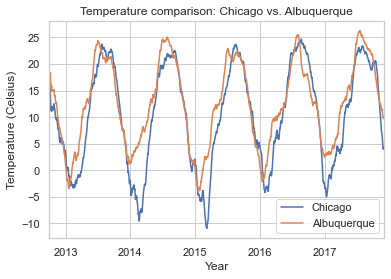

In [12]:
temperature_df_Celsius_patched[["Chicago","Albuquerque"]].rolling('30D').mean().plot(title="Temperature comparison: Chicago vs. Albuquerque")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

Rolling average takes average of the data points in a widow. In the above case a widow of 30 calendar days were selected to calculate average temperature.

Moving average model is used for time series analysis for future prediction. It is used when the output data is linearly dependendt on the past and present values. Because of this MA model assumes equal weights for all data points unlike the rolling average.

7. Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.

In [13]:
# Choosing my five cities:
sarima_df = temperature_df_Celsius_patched.loc[:,['Chicago', 'Albuquerque', 'Miami', 'Minneapolis', 'Denver']]
sarima_df.head(3)

,Chicago,Albuquerque,Miami,Minneapolis,Denver
datetime,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN
2012-10-01 13:00:00,10.860000,11.970000,26.570000,13.720000,11.460000
2012-10-01 14:00:00,10.904691,12.004558,26.582518,13.743636,11.457306


In [ ]:
sarima_diff= sarima_df.copy(deep=False)

for i in sarima_df:
    #converting non stationary into stationary by taking seasonal and non seasonal difference
    #sarima_df[i].plot()
    sarima_diff["diff_"+i]=sarima_df[i].diff().diff(7).dropna()
    sarima_diff=sarima_diff.dropna()
    #plotting acf,pacf
    plot_acf(sarima_diff[["diff_"+i]],zero=False,lags=10,missing='drop',title="ACF for "+i);
    plot_pacf(sarima_diff[["diff_"+i]],lags=10,method='ywm',title="PACF for "+i);
    #creating SARIMA model
    model=SARIMAX(sarima_diff["diff_"+i],order=(5,1,0),seasonal_order=(2,1,0,12))
    fitting_model=model.fit(low_memory=True)
    print(fitting_model.summary())
    #forecasting for next 30 days
    forecast_df=pd.DataFrame(fitting_model.forecast(steps=5))
    forecast_df.plot()
    plt.title("Forecasting for 30 days out for "+i)
    plt.xlabel('Year')
    plt.ylabel('Temperature in Celsius')

C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


Graph the predicted values 30 days out.

8. Explain what you see when you perform results.summary() on the cities in question 7. 


Bonus:
What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.